<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/05_03_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH5 회귀(Regression)


## 01 회귀 소개


대표적인 선형 회귀 모델

• 일반선형회귀: 예측값과실제값의Rss(Residual SumofSquares)를 최소화할 수 있도록 회귀 계수를 최적화하며,규제(Regularization)를 적용하지 않은 모델입니다.

• 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2규제를 추가한 회귀 모델입니다.릿지 회귀는 L2규제를 적용하는데, L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수 값을 더 작게 만드는 규제 모델입니다.

• 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1규제를 적용한 방식입니다.L2규제가 회귀 계수 값의 크기를 줄이는데 반해, L1규제는 예측 영향력이 작은 피처의 회귀계수를 0으로 만들어 회귀 예측시 피처가 선택 되지 않게하는것입니다. 이러한 특성 때문에 L1규제는 피처 선택 기능으로도 불립니다.

• 엘라스틱넷(ElasticNet): L2. L1 규제를 함께 결합한 모델입니다. 주로 피처가 많은 데이터 세트에 서용되며, L1규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정합니다.

• 로지스틱회귀(LogisticRegression): 로지스틱회귀는 회귀라는 이름이 붙어있지만. 사실은 분류에 사용되는 선형모델입니다. 로지스틱회귀는 매우 강력한 분류 알고리즘입니다. 일반적으로 이진 분류 뿐만 아니라 희소영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보입니다.

##02 단순 션형 회귀를 통한 회귀 이해

##03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

경사 하강법의 사전적 의미인 '점진적인 하강' 이라는 뜻처럼, 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식으로, 비용함수 RSS를 최소화하는 방법을 직관적으로 제공함.

경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W값을 보정할 수 있을까?" 이다.

<경사 하강법의 일반적인 프로세스>
* Step1: w1,w0를 임의의 값으로 설정하고 첫 비용함수의 값을 계산합니다.
* Step2: w1과 w0을 업데이트 한 후 다
시 비용함수의 값을 계산.
* Step 3: 비용함수의 값이 감소했으면 다시 Step 2를 반복합니다. 더 이상 비용함수의 값이 감소하지 않으면 그때의
w1,w0를 구하고 반복을 중지합니다.

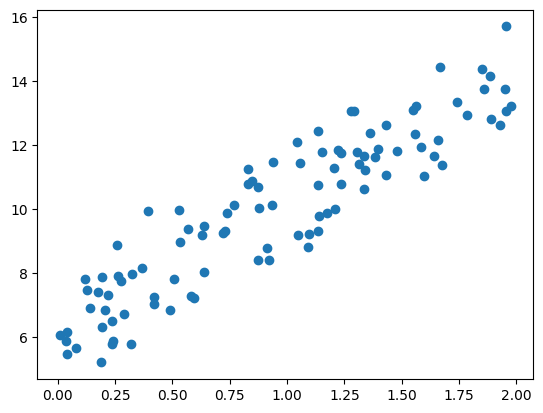

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
## 비용함수 get_cost() 정의
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [4]:
## 경사 하강법 구현 - gradient_descent()함수 생성

# w1과 w0를 업데이터 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.1):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이터할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update


## w1과 w0 업데이터 함수 gradient_descent_step() 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0


## 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수 생성하여 예측 오류 계산
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


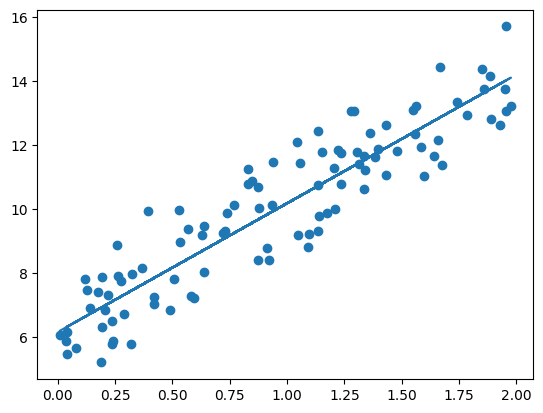

In [5]:
## 회귀선 그리기

plt.scatter(X,y)
plt.plot(X, y_pred)

일반적 경사 하강법: 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 떄문에 수행 시간이 오래 걸림

-> 실전에서 확률적 경사 하강법 이용


* 확률적 경사 하강법: 일부 데이터만 이용해 w가 업데이트되는 값을 계산하기에 경사하강법에 비해 빠른 속도 보장. 대용량 데이터의 경우 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법 이용하여 최적 비용함수를 도출함.
* (미니 배치) 확률적 경사 하강법 구현: stochastic_gradient_descent_steps() 함수

-> 전체X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update 를 계산한다는 차이가 있음.

In [6]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

In [7]:
## stochastic_gradient_descent_steps() 이용: w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))


w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


##04 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측


### LinearRegression 클래스 - Ordinary Least Squares
예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화해 OLS(OrclinaryLeastSquares) 추정 방식으로 구현한 클래스.

### 회귀 평가 지표
오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구함.

ex) MAE,MSE,RMSE,R^2

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


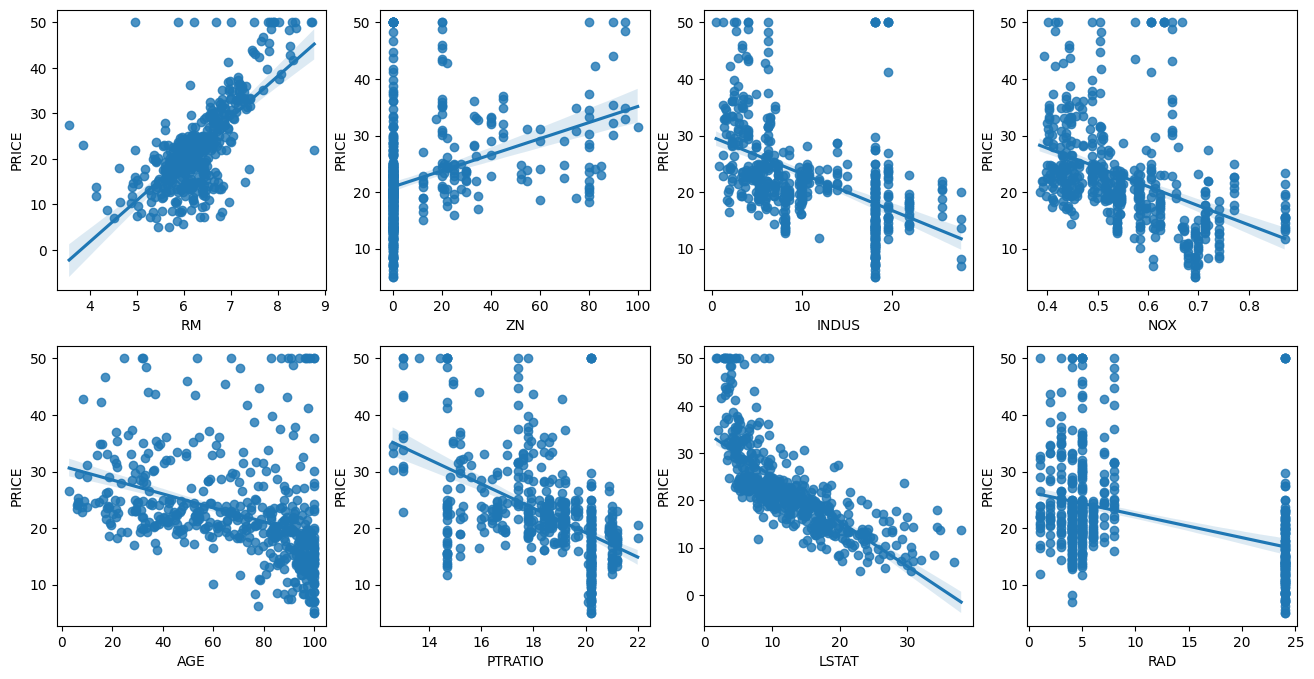

In [9]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr= LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE: 4.159
Variance score: 0.757


In [11]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [13]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE: 5.829


## 05 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

다항회귀를 비선형회귀로 혼동하기 쉽지만, 다항회귀는 선형회귀로, 선형회귀/비선형회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립 변수의 선형/비선형 여부와는 무관하다.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 다항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [18]:
def polynomial_func(X):
    y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [19]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


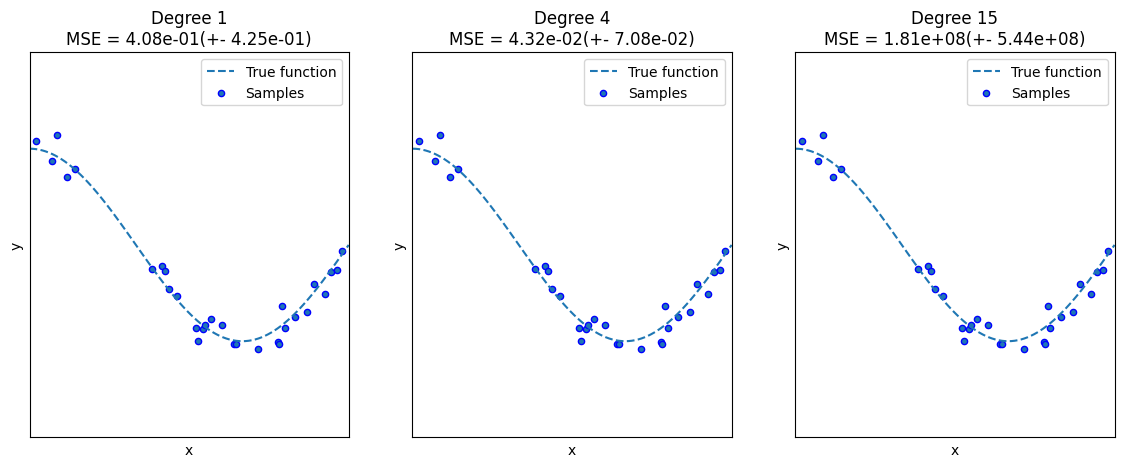

In [22]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree 별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

* 맨 왼쪽의 Degree1 예측곡선은 단순한 직선으로서 단순선형회귀와 똑같습니다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순함. 예측 곡선이 학습데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델임. MSE값은 약 0.407.

* 가운데 Degree4 예측곡선은 실제 데이터 세트와 유사함.변동하는 잡음까지 예측하지는 못했지만,학습데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델임. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능 지님.

* 맨 오른쪽 Degree15 예측곡선은 MSE값이 182815432가 될 정도로 어처구니 없는 오류값이 발생함. 예측 곡선을 보면 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과로, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형 태의 예측 곡선이 만들어짐. 결과적으로 학습데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는
수준의 높은 MSE값이 나옴.

### 편향-분산트레이드오프(Bias- Variance Trade off)

앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한방향성으로 치우친 경향이 있음. 이런 모델 을 고편향(High Bias)성을 가졌다고 표현함.

반대로 Degree 15와 같은 모델은 학습데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 됨. 이런 모델을 고분산(HighVariance)성을 가졌다고 표현함.

